#### Trading mechanism

In a Perpetual Futures market, traders are periodically awarded or penalized by a 'funding rate' based on whether their entry positions are above or below the price of the asset in the spot market, and whether they are long or short the position. 

For example, a trader who is long BTC at `$`40,000 will receive the funding rate if the spot price is `$`42,000 at the time of funding. A trader who is short (indeed, the trader who took the opposite side of the long position) will have to pay the same funding rate to the exchange. Since every long position is matched with a short position, the traders are basically paying each other each period, provided they have balances in their accounts. 

Since the funding depends on the spot price data provided exogneously to the perpetual market, to create our simulation, we first need a data-generating process that creates these spot prices.

#### External price data for simulation

We will first simulate this external 'spot' price using a Geometric Brownian Motion (GBM) data-generating process. This is the most commonly used model for simulating stock prices \<will include citation source\>. 

A GBM is a stochastic process governed by the following equation:

$ S_t = S_0 exp((\mu - \frac{\sigma}{2}) + \sigma W_t )$

Where:

$t$ : time 

$S_t$ : the price at time $t$

$S_0$ : the price at $t = 0$

$\mu$ : a 'drift' variable representing the trend of the price movement

$\sigma$ : the volatility or variation of the prices (standard deviation). In this formulation, the volatility is constant, which is not very realistic. This will be addressed later.

$W_t$ : a 'weiner process' representing the unpredictability of the prices (here a random walk)

##### Sample Code:

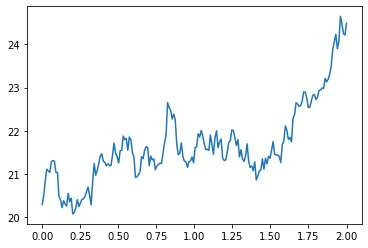

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Time horizon over which the data will be generated. Can be understood as any period we so choose
Time_horizon = 2

mu = 0.1
sigma = 0.1
S0 = 20
# Time interval for each server tick
dt = 0.01

# Number of server ticks in given time period
N = round(Time_horizon/dt)

# Generate the server ticks as a vector of length N, with interval dt (linspace splits T N times, starting at 0 here)
t = np.linspace(0, T, N)

# Generate weiner process 
# Draw N values from normal distribution for increment/decrement at each server tick, 
W = np.random.standard_normal(size = N) 
# then sum them cumulatively to get random walk
W = np.cumsum(W)*np.sqrt(dt) 

# Generate GBM using formula
S = S0*np.exp((mu-0.5*sigma**2)*t + sigma*W)

# Plot
plt.plot(t, S)
plt.show()

#### Agents

The traders in this simulation are based on this paper: Carl Chiarella and Giulia Iori. A simulation analysis of the microstructure of double auction markets. Quantitative Finance, 2:346–353, 2002. 

This is a seminal paper that particularly models Limit Order Based exchanges simply.

In this paper, each trader is modelled as a composite of the following types of traders:

- Fundamentalist traders who believe the prices are mean reverting to a 'true price'
- Chartists who use local trends to forecast prices
- Noise traders who place trades randomly

Our model will be based on code by Blake LeBaron from the [agentfin](http://people.brandeis.edu/~blebaron/classes/agentfin/Chiarellaetal.html) website.

##### Sample Agent Code: